In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys 
import os
import time
import sklearn 
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl, np, pd, sklearn, tf, keras:
    print(model.__name__, model.__version__)


2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000], x_train_all[5000:]
y_valid,y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [9]:
print(np.max(x_train),np.min(x_train))

255 0


In [18]:
# 数据归一化 
# y = (x - u) / std
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) # fit_transform
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) # transform
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [19]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [20]:
# tf.keras.models.Sequential()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# sparse原因 y->index. y->one_hot
# sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd' , metrics =['accuracy'])


In [21]:
history = model.fit(x_train_scaled, y_train, epochs=10 ,validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.5394 - accuracy: 0.8094 - val_loss: 0.4006 - val_accuracy: 0.8604
Epoch 2/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3916 - accuracy: 0.8582 - val_loss: 0.3620 - val_accuracy: 0.8754
Epoch 3/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3530 - accuracy: 0.8714 - val_loss: 0.3460 - val_accuracy: 0.8762
Epoch 4/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3270 - accuracy: 0.8811 - val_loss: 0.3426 - val_accuracy: 0.8764
Epoch 5/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3096 - accuracy: 0.8881 - val_loss: 0.3302 - val_accuracy: 0.8800
Epoch 6/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2927 - accuracy: 0.8931 - val_loss: 0.3244 - val_accuracy: 0.8822
Epoch 7/10
55000/55000 [===========================

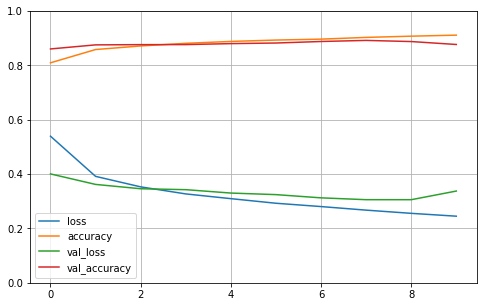

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [24]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37535073599815366, 0.8632]